In [2]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [3]:
SFWdic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'SFWxx':[], 'SFWxy':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}

Us = np.linspace(0,2,5)
mus = np.linspace(-2.5,1,15)
for Uv in Us:
    for m in mus:
        ham = hamiltonian.Model(N=2, kind='dDSL', delta=[3,3], U=[Uv,Uv], mu=[m,m])
        dels, nus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=10, Nmax=1300)

        nu_test = np.sum(ham.striped_props()[2])
        if nu_test<=0.8:
            continue
        elif nu_test>=3.5:
            print('break', Uv, m)
            break

        sfws, sdsfw = ham.detSFW(30)

        SFWdic['U'].append(Uv)
        SFWdic['mu'].append(m)
        SFWdic['nu'].append(nu_test)
        SFWdic['sq_det_SFW'].append(sdsfw)
        SFWdic['SFWxx'].append(sfws[0])
        SFWdic['SFWxy'].append(sfws[1])
        SFWdic['delta'].append((dels[0,-1],dels[1,-1]))
        SFWdic['ns'].append((nus[0,-1],nus[1,-1]))
        SFWdic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
        SFWdic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
        print('Done mu=', m)
        
    print('Done', Uv)


Done mu= -2.0
Done mu= -1.75
Done mu= -1.5
Done mu= -1.25
Done mu= -1.0
Done mu= -0.75
Done mu= -0.5
Done mu= -0.25
Done mu= 0.0
break 0.0 0.25
Done 0.0
Done mu= -2.0
Done mu= -1.75
Done mu= -1.5
Done mu= -1.25
Done mu= -1.0
Done mu= -0.75
Done mu= -0.5
Done mu= -0.25
break 0.5 0.0
Done 0.5
Done mu= -2.0
Done mu= -1.75
Done mu= -1.5
Done mu= -1.25
Done mu= -1.0
Done mu= -0.75
Done mu= -0.5
break 1.0 -0.25
Done 1.0
Done mu= -2.25
Done mu= -2.0
Done mu= -1.75
Done mu= -1.5
Done mu= -1.25
Done mu= -1.0
Done mu= -0.75
break 1.5 -0.5
Done 1.5
Done mu= -2.25
Done mu= -2.0
Done mu= -1.75
Done mu= -1.5
Done mu= -1.25
Done mu= -1.0
break 2.0 -0.75
Done 2.0


In [4]:
SFWdic

{'U': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0],
 'mu': [-2.0,
  -1.75,
  -1.5,
  -1.25,
  -1.0,
  -0.75,
  -0.5,
  -0.25,
  0.0,
  -2.0,
  -1.75,
  -1.5,
  -1.25,
  -1.0,
  -0.75,
  -0.5,
  -0.25,
  -2.0,
  -1.75,
  -1.5,
  -1.25,
  -1.0,
  -0.75,
  -0.5,
  -2.25,
  -2.0,
  -1.75,
  -1.5,
  -1.25,
  -1.0,
  -0.75,
  -2.25,
  -2.0,
  -1.75,
  -1.5,
  -1.25,
  -1.0],
 'nu': [(0.9505947084867823-1.1305306244402087e-20j),
  (1.3247361847531653+1.1484893533726493e-19j),
  (1.5447334192496915+1.5510069032591752e-20j),
  (1.680480338835913+1.6771437220240552e-19j),
  (1.8048458293353222+3.7105081710022035e-20j),
  (1.8899859670509591-1.101285994718472e-21j),
  (1.9450279280434013-3.3428646229504726e-19j),
  (1.980724907991088+7.322960320472005e-20j),
  (2.9994252563058588+2.86277

In [5]:
import pandas as pd

In [6]:
SFWdf = pd.DataFrame.from_dict(SFWdic)

In [7]:
SFWdf

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError
0,0.0,-2.00,0.950595-0.000000j,0.000583-0.000000j,[(-0.0005855161625507049+4.195271196191445e-19...,[(-5.690958867851469e-05-3.1369475166238804e-2...,"((0.00019713708709060248+0j), (0.0001971370870...","((0.4752625555661354-5.790184757142072e-20j), ...",0.000168,0.000152
1,0.0,-1.75,1.324736+0.000000j,0.001038-0.000000j,[(-0.0016122320424633164+7.401229353841307e-19...,[(-0.0012338492382235743-1.3360068778212026e-1...,"((0.00040232058589918877+0j), (0.0004023205858...","((0.6622817544414924+4.798306124365286e-20j), ...",0.000344,0.000104
2,0.0,-1.50,1.544733+0.000000j,0.389961-0.000000j,"[(-0.4364718505237938+4.588564459789298e-18j),...","[(-0.1960553909823739+5.342693524869869e-19j),...","((0.00019713708709060248+0j), (0.0001971370870...","((0.7723141071590149-2.067113577888899e-20j), ...",0.000168,0.000096
3,0.0,-1.25,1.680480+0.000000j,0.000597-0.000000j,[(-0.0007678098285602885+3.8477371104559114e-1...,[(-0.00048339299784424237-6.591851381639723e-1...,"((0.00040232058589918877+0j), (0.0004023205858...","((0.840102699840062+4.175447259707907e-20j), (...",0.000344,0.000108
4,0.0,-1.00,1.804846+0.000000j,0.129201-0.000000j,[(-0.47719407127279856+8.229519577133996e-18j)...,[(-0.45937064197740746+3.697459161594443e-18j)...,"((0.00019713708709060248+0j), (0.0001971370870...","((0.9023329172444068-8.869382103034048e-20j), ...",0.000168,0.000074
5,0.0,-0.75,1.889986-0.000000j,0.001078+0.000000j,[(-0.0043847302411832954-1.1472621931911797e-1...,[(-0.004250130897733481-3.011757182910276e-19j...,"((0.0002816244101294321+0j), (0.00028162441012...","((0.9448095930959536-6.427731398810418e-20j), ...",0.000241,0.000119
6,0.0,-0.50,1.945028-0.000000j,0.000292+0.000000j,[(-0.0017805723731905499-1.1258651035774098e-1...,[(-0.0017563938638104444+8.800567528843834e-19...,"((0.00019713708709060248+0j), (0.0001971370870...","((0.972307756247129-1.6739889731735643e-19j), ...",0.000168,0.000128
7,0.0,-0.25,1.980725+0.000000j,0.000066-0.000000j,[(-6.860625245268747e-05-5.38221282814534e-19j...,[(-1.6935579343014442e-05+2.0068331987841546e-...,"((0.00019713708709060248+0j), (0.0001971370870...","((0.9899206564222216-3.874027400230327e-20j), ...",0.000168,0.000205
8,0.0,0.00,2.999425+0.000000j,7.734316+0.000000j,"[(-7.7343155328283055-3.455187759004215e-18j),...",[(0.0005014003171119125+1.3177456888318134e-18...,"((0.0005747436941416983+0j), (0.00057474369414...","((0.9998084187686195-6.456534489705071e-20j), ...",0.000491,0.000164
9,0.5,-2.00,1.154720+0.000000j,0.112091-0.000000j,[(-0.22389487972843677+1.4812414089727732e-18j...,[(-0.19381568198742763+1.2870501019973959e-18j...,"((0.01238468896127681+5.513141405872344e-20j),...","((0.5871197565533346+6.295799697141918e-21j), ...",0.001460,0.000087


In [ ]:
#SFWdf.to_csv('SF_U_zero_to_2')

In [20]:
U = np.array(SFWdf.U)
mu=np.array(SFWdf.mu)
nu = np.array(SFWdf.nu)
sdsfw = np.array(SFWdf.sq_det_SFW)

In [25]:
U

array([0.        , 0.        , 0.        , 0.        , 0.83333333,
       0.83333333, 0.83333333, 1.66666667, 1.66666667, 2.5       ,
       2.5       , 2.5       , 3.33333333, 3.33333333, 4.16666667,
       4.16666667, 5.        ])

In [28]:
arr = np.concatenate((U,mu,nu,sdsfw),axis=0).reshape(4,17)

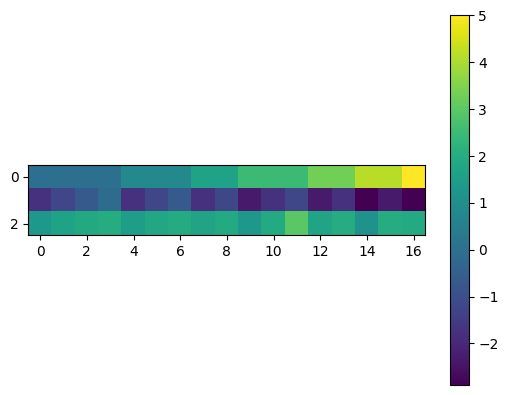

In [32]:
plt.imshow(np.real(arr[:3]))
plt.colorbar()

In [35]:
Uarr = SFWdf.U.unique()
Uarr

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        ])

In [43]:
yarr = np.array(SFWdf.sq_det_SFW.loc[np.abs(SFWdf.nu-2)<0.1])
SFWdf.U.loc[np.abs(SFWdf.nu-2)<0.1]

2     0.000000
3     0.000000
6     0.833333
8     1.666667
10    2.500000
13    3.333333
15    4.166667
16    5.000000
Name: U, dtype: float64

In [44]:
yarr

array([0.00228557-3.81227687e-17j, 0.00017182+1.19079432e-18j,
       0.00904914-7.38551871e-19j, 0.12557475+2.92539890e-18j,
       0.11085855-2.88329620e-18j, 0.00896336+2.12614388e-19j,
       0.00677324+4.43452145e-19j, 0.06956721-3.90581073e-19j])

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


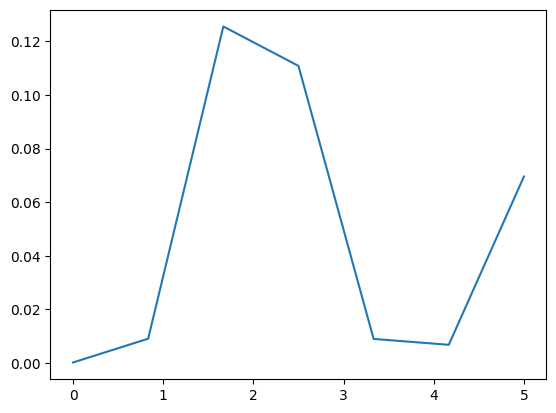

In [45]:
plt.plot(Uarr, yarr[1:])

In [37]:
SFWdic['U'].append(1)

In [38]:
SFWdic

{'U': [1, 1]}

In [ ]:
nu_test = np.sum(ham.striped_props()[3])
nu_test
ham.U

[0.0, 0.0]

In [ ]:
nu_test

0.0

In [ ]:
ham.mu

[-2.1578947368421053, -2.1578947368421053]

In [ ]:
sfw

[]

In [ ]:
sd

[]

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

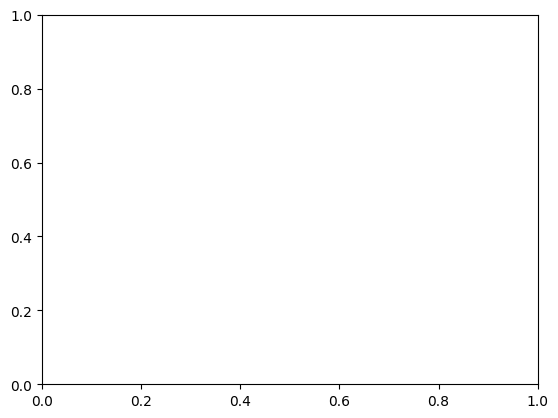

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],sd[:])

In [ ]:
np.amax(sd[1:])

(0.5331218370265398-1.61211169016373e-18j)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


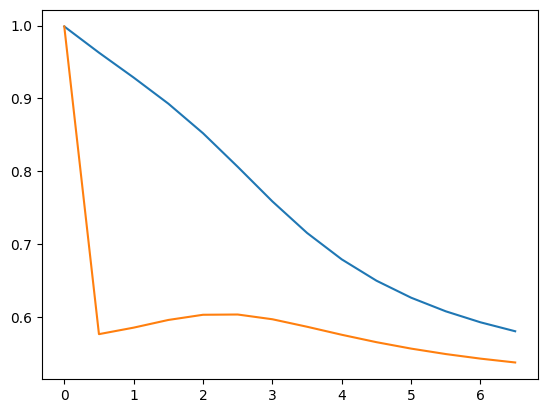

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],ns)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


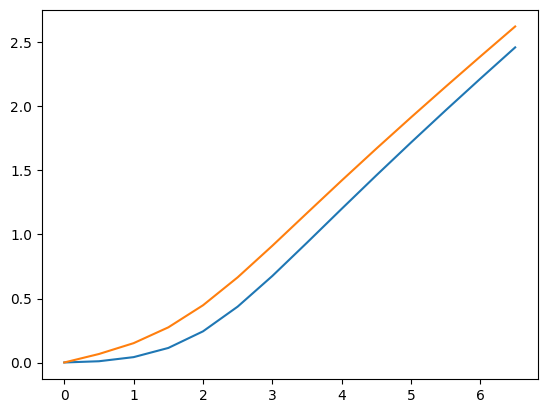

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],ds)

In [ ]:
ns

[array([0.99881126+4.20933095e-20j, 0.99881126+3.69651728e-21j]),
 array([0.96287843+7.35337838e-21j, 0.57625242+8.09819317e-20j]),
 array([0.92868529+1.43012343e-20j, 0.58518424+6.31414412e-20j]),
 array([0.89283604-4.55553672e-20j, 0.59573201+5.52488790e-20j]),
 array([0.85219808-2.27785820e-20j, 0.60286118-2.29877207e-20j]),
 array([0.8060954 +5.12565026e-20j, 0.60321961+1.51086971e-20j]),
 array([0.75856967-1.77187665e-20j, 0.59670032-3.02550051e-20j]),
 array([0.71525665+9.45157967e-21j, 0.58640513+9.05772357e-21j]),
 array([0.67896414-3.08983257e-20j, 0.57539426+3.21118991e-20j]),
 array([0.64968307+9.41073013e-21j, 0.56522548-1.00285833e-19j]),
 array([0.62630307-1.13378579e-20j, 0.55639051-2.26028369e-20j]),
 array([0.60759225+4.69237436e-20j, 0.54890435-5.22650414e-20j]),
 array([0.59250529+2.79534005e-20j, 0.54261671+1.38037461e-20j]),
 array([0.58022539+2.90973489e-20j, 0.53734129-2.32906555e-20j])]

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


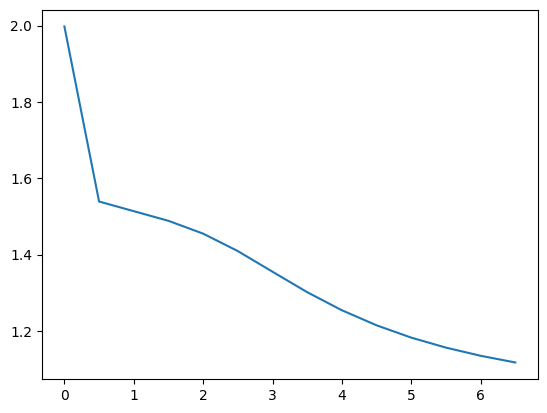

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],np.sum(ns, axis=1))